In [2]:
import pandas as pd
import numpy as np 
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.display.float_format ='{:,.2f}'.format
pd.options.display.max_rows =None
pd.options.display.max_columns = None 
sns.set()

In [3]:
df = pd.read_csv('all_data.csv',encoding='iso-8859-1')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2158 entries, 0 to 2157
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerid      2157 non-null   float64
 1   firstname       2157 non-null   object 
 2   lastname        2157 non-null   object 
 3   city            2157 non-null   object 
 4   country         2157 non-null   object 
 5   phone           2157 non-null   object 
 6   orderid         2155 non-null   float64
 7   orderdate       2155 non-null   object 
 8   ordernumber     2155 non-null   float64
 9   totalamount     2155 non-null   float64
 10  product id      2156 non-null   float64
 11  productname     2156 non-null   object 
 12  supplierid      2156 non-null   float64
 13  unitprice       2156 non-null   float64
 14  package         2156 non-null   object 
 15  isdiscontinued  2156 non-null   object 
 16  companyname     2156 non-null   object 
 17  contactname     2156 non-null   o

In [5]:
df.head

<bound method NDFrame.head of       customerid   firstname         lastname             city      country  \
0          85.00        Paul          Henriot            Reims       France   
1          85.00        Paul          Henriot            Reims       France   
2          85.00        Paul          Henriot            Reims       France   
3          79.00       Karin          Josephs          Münster      Germany   
4          79.00       Karin          Josephs          Münster      Germany   
5          34.00       Mario           Pontes   Rio de Janeiro       Brazil   
6          34.00       Mario           Pontes   Rio de Janeiro       Brazil   
7          34.00       Mario           Pontes   Rio de Janeiro       Brazil   
8          84.00        Mary          Saveley             Lyon       France   
9          84.00        Mary          Saveley             Lyon       France   
10         84.00        Mary          Saveley             Lyon       France   
11         76.00     P

#issues:

#1.delete orders with nan values 

#2.rename city.1,country.1,phine.1 columns

#3.change orderdate type into date 

#4.change id columns ,and ordernumber column to integer



In [6]:
df[df['orderid'].isnull()]
# how to get a list of all null values 

,customerid,firstname,lastname,city,country,phone,orderid,orderdate,ordernumber,totalamount,product id,productname,supplierid,unitprice,package,isdiscontinued,companyname,contactname,city.1,country.1,phone.1,fax
2155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.00,Stroopwafels,22.00,9.75,24 pieces,False,Zaanse Snoepfabriek,Dirk Luchte,Zaandam,Netherlands,(12345) 1212,(12345) 1210
2156,22.00,Diego,Roel,Madrid,Spain,(91) 555 94 44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2157,57.00,Marie,Bertrand,Paris,France,(1) 42.34.22.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# delete all null values 
df.dropna(subset='orderid',inplace=True)

In [8]:
# how to rename columns 
df.rename(columns={'city.1':'suppcity','country.1':'suppcountry','phone.1':'suppphone'},inplace=True)

In [9]:
#change orderdate and id columns type to date,integer
df.orderdate=pd.to_datetime(df.orderdate)

In [10]:
# for every id columns chnge its type into integer 
for cols in df.columns:
    if  'id' in cols or 'ordernumber' in cols:
        df[cols] = df[cols].astype(int)

EDA

Univariate Analysis



In [11]:
#Quantitative Data 
#Decribe TotalAmount 
df.totalamount.describe()


count    2,155.00
mean     1,986.04
std      2,121.85
min         12.50
25%        670.80
50%      1,419.80
75%      2,393.50
max     17,250.00
Name: totalamount, dtype: float64

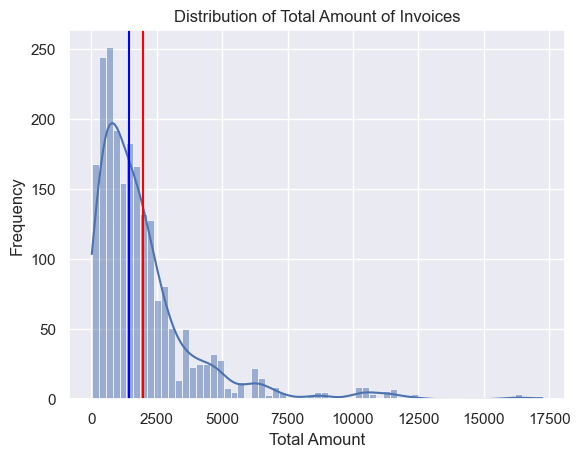

In [12]:
sns.histplot(data=df,x='totalamount',kde=True)
plt.title('Distribution of Total Amount of Invoices')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.axvline(df.totalamount.mean(),color='red')
plt.axvline(df.totalamount.median(),color='blue')

In [13]:
min =df.totalamount.min()
q1 = df.totalamount.quantile(0.25)
q2= df.totalamount.quantile(0.50)
q3 = df.totalamount.quantile(0.75)

IQR = q3-q1
LB  = q1 - (1.5*IQR)
UB  = q3 + (1.5*IQR)
print(
'min=',min,
'q1 =',q1,
'q2 =',q2,
'q3 =',q3,
'IQR=',IQR,
'LB =',LB,
'UB =',UB)


min= 12.5 q1 = 670.8 q2 = 1419.8 q3 = 2393.5 IQR= 1722.7 LB = -1913.2500000000002 UB = 4977.55


<Axes: xlabel='totalamount'>

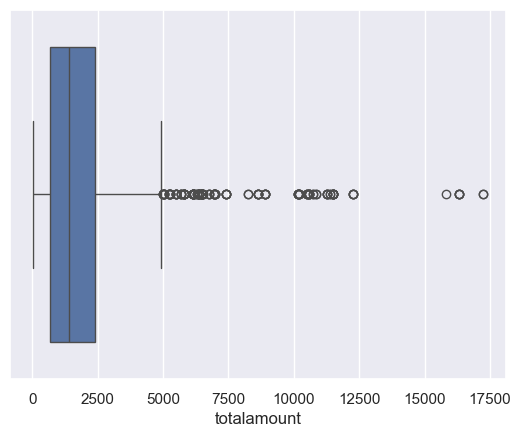

In [14]:
sns.boxplot(data=df,x='totalamount')

In [15]:
px.box(data_frame=df,x='totalamount')

In [16]:
df[df.totalamount > 15000].count()

customerid        7
firstname         7
lastname          7
city              7
country           7
phone             7
orderid           7
orderdate         7
ordernumber       7
totalamount       7
product id        7
productname       7
supplierid        7
unitprice         7
package           7
isdiscontinued    7
companyname       7
contactname       7
suppcity          7
suppcountry       7
suppphone         7
fax               4
dtype: int64

In [17]:
px.bar(data_frame=df.city.value_counts(),title='Distribution of cities')

In [18]:
px.bar(data_frame=df.country.value_counts(),title='Distribution of countries')


In [19]:
px.pie(data_frame=df,names='country',title='Relative Freqancy of countries sales')

through the preliminary analyisi,we see that boise is the city that has the largest share of purchasing our products with 116 invoices, and that usa and germany are the most purchasing countries for our products with  680 invoices and 21.5% of our total sales 

In [20]:
df.groupby('country',as_index=False)['totalamount'].sum().sort_values('totalamount',ascending=False)

,country,totalamount
19,USA,"926,143.87"
8,Germany,"810,631.96"
1,Austria,"492,686.70"
3,Brazil,"310,243.59"
7,France,"261,737.31"
20,Venezuela,"179,496.89"
16,Sweden,"174,999.55"
18,UK,"171,228.89"
4,Canada,"161,234.00"
9,Ireland,"156,949.88"


In [21]:
date_total = df[['orderdate','totalamount']]
date_total = date_total.set_index('orderdate')

In [22]:
px.line(data_frame=date_total)

In [23]:
date_country = df[['orderdate','country']]
date_country = date_country.set_index('orderdate')
date_country = date_country.country.resample(rule='1M').nunique()


In [24]:
px.line(data_frame= date_country)

In [25]:
cust_orders={
    'fullname' : df.firstname + ' ' + df.lastname,
    'totalamount' : df.totalamount 

}
cust_orders=pd.DataFrame(cust_orders)
cust_orders.sort_values('fullname').head()

,fullname,totalamount
1979,Alejandra Camino,361.00
89,Alejandra Camino,155.40
88,Alejandra Camino,86.50
87,Alejandra Camino,86.50
86,Alejandra Camino,86.50


In [26]:
px.bar(cust_orders.groupby('fullname')['totalamount'].count().sort_values(ascending=False).head(10),text_auto=True,title='no.of orders per customer ',
labels={'fullname':'full Name ','value':'Frequancy'})

In [27]:
px.bar(cust_orders.groupby('fullname')['totalamount'].sum().sort_values(ascending=False).head(10),text_auto=True,title='no.of orders per customer ',
labels={'fullname':'full Name ','value':'Frequancy'})

In [28]:
mutlivar = df[['orderdate','country','totalamount']]
mutlivar = mutlivar.set_index('orderdate')
mutlivar.head()

,country,totalamount
orderdate,,
2012-07-04,France,440.00
2012-07-04,France,440.00
2012-07-04,France,440.00
2012-07-05,Germany,"1,863.40"
2012-07-05,Germany,"1,863.40"


In [29]:
mutlivar = mutlivar.resample('1M').agg({'country' : 'nunique' , 'totalamount' : 'sum'})
mutlivar.head()

,country,totalamount
orderdate,,
2012-07-31,11,"89,940.50"
2012-08-31,11,"84,055.10"
2012-09-30,11,"82,387.90"
2012-10-31,13,"149,752.20"
2012-11-30,11,"151,076.20"


In [30]:
fig= px.bar(data_frame=mutlivar,x=mutlivar.index,y=round(mutlivar.totalamount,0)
,color=mutlivar.country,text_auto=True
,title='Grand total amount of all countries per month '
,labels={'orderdate':'Order Date ','y':'Total Amount'})
fig.update_traces(textposition='outside')
fig.update_layout(title_x=0.5)
fig.show()

In [31]:
mutlivar = df[['orderdate','country','totalamount']]

In [32]:
mutlivar.orderdate = mutlivar.orderdate.dt.to_period('M')

C:\Users\Abdeen\AppData\Local\Temp\ipykernel_7744\2769812569.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
mutlivar = mutlivar.groupby(['orderdate','country'], as_index=False)['totalamount'].sum().sort_values(by='totalamount',ascending=False)
mutlivar.head()

,orderdate,country,totalamount
311,2014-04,USA,"123,724.56"
166,2013-07,USA,"100,413.90"
255,2014-01,USA,"96,773.20"
206,2013-10,Germany,"85,770.75"
249,2014-01,Germany,"81,250.45"


In [34]:
mutlivar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 311 to 228
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   orderdate    322 non-null    period[M]
 1   country      322 non-null    object   
 2   totalamount  322 non-null    float64  
dtypes: float64(1), object(1), period[M](1)
memory usage: 10.1+ KB


In [35]:
mutlivar.orderdate=mutlivar.orderdate.astype('datetime64[ns]')

In [36]:
px.scatter(data_frame=mutlivar,x=mutlivar.orderdate,y='totalamount',color='country',size='totalamount')

In [37]:
px.bar(data_frame=mutlivar,x=mutlivar.orderdate,y='totalamount',color='country')